In [2]:
!pip install IPython
from IPython.display import Image

# 1 Tensorflow란?

## 1.1 텐서플로우 소개

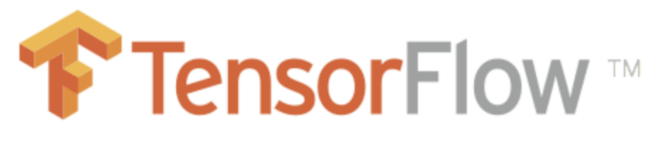

In [3]:
Image("11.png")

- 머신러닝을 위한 오픈소스 플랫폼 - 딥러닝 프레임워크
- 구글이 주도적으로 개발 - 구글 코랩에는 기본 장착
- 최근 2.x 버전이 발표
- Keras라고 하는 고수준 API를 병합

## 1.2 텐서플로우?

- Tensor : 벡터나 행렬을 의미
- Graph : 텐서가 흐르는 경로(혹은 공간)
- Tensor Flow : 텐서가 Graph를 통해 흐른다~

# 2 딥러닝의 기초 feat. Keras

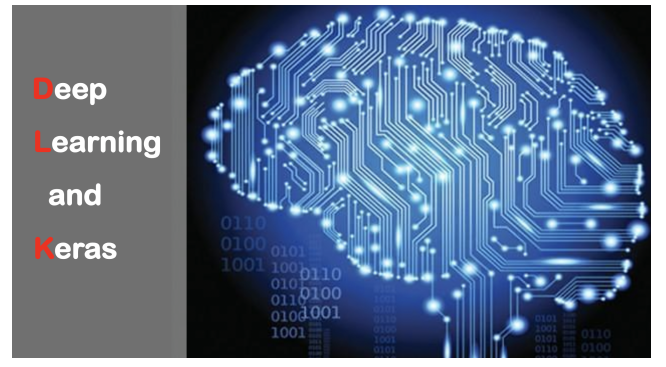

In [4]:
Image("12.png")

## 2.1 신경망에서 아이디어를 얻어서 시작된 Neural Net

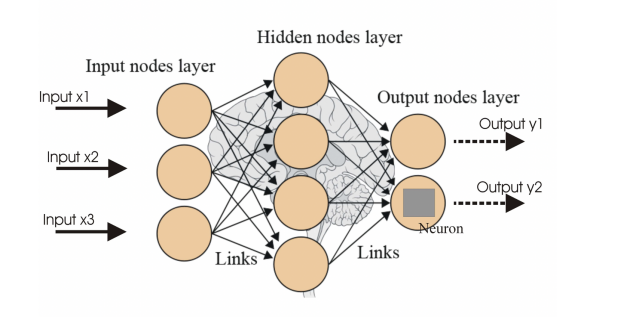

In [5]:
Image("13.png")

## 2.2 뉴런

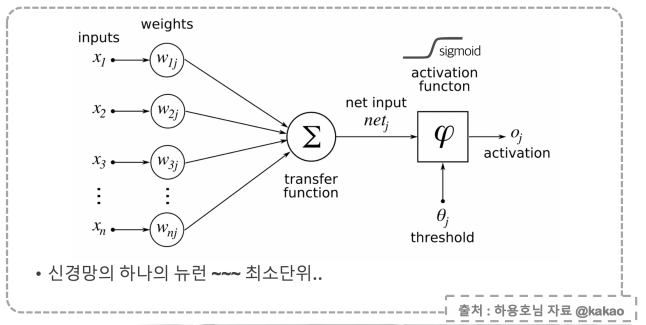

In [17]:
Image("14.png")

- 뉴런은 입력, 가중치, 활성화함수, 출력으로 구성
- 뉴런에서 학습할 때 변하는 것은 가중치. 처음에는 초기화를 통해 랜덤값을 넣고, 학습과정에서 일정한 값으로 수렴

## 2.3 레이어와 망(net)

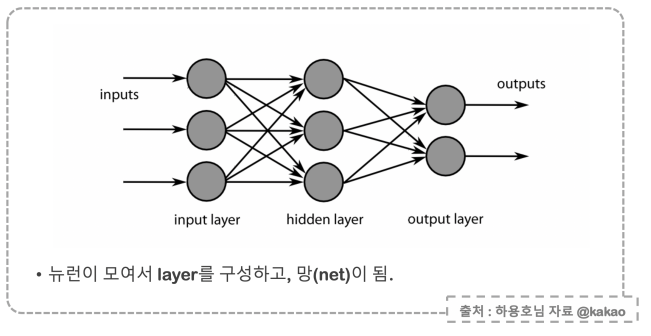

In [18]:
Image("15.png")

## 2.4 딥러닝~

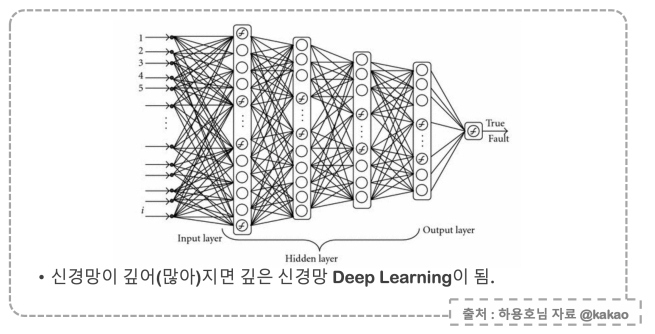

In [19]:
Image("16.png")

## 2.5 데이터 하나 무작정 읽어보자

In [49]:
import numpy as np

raw_data = np.genfromtxt('x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

## 2.6 어떻게 생겼나?

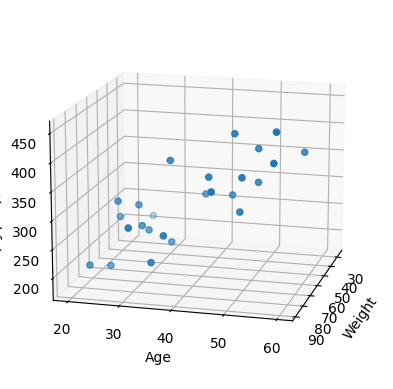

In [56]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

## 2.8 먼저 모델을 주어진 데이터로 얻는 것

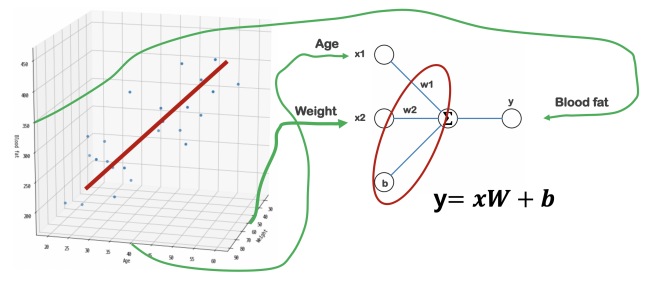

In [21]:
Image("18.png")

- 직선 모델을 얻는 것으로 하면, 주어진 입출력 데이터로 W와 b 즉, 모델을 얻는 것

## 2.9 모델을 구한 후에는?

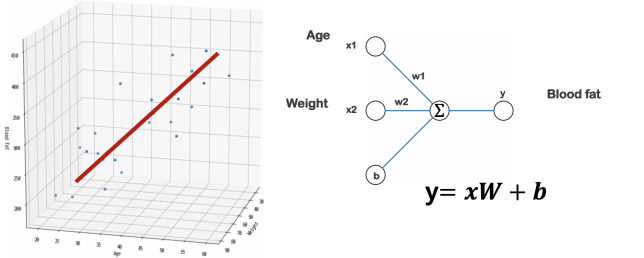

In [22]:
Image("19.png")

- 이제 모델(W,b)을 이용해서, 질문을 하는 것, 즉, age 40, weight 80인 사람의 Blood fat은 얼마? 하면, 그 대답을 얻는 것이 방금 학습을 한 이유

## 2.10 현재 우리의 목표

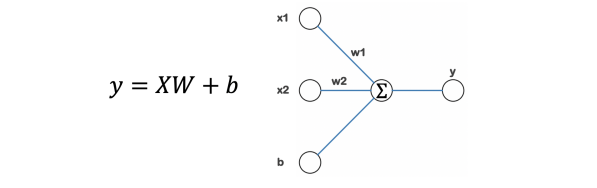

In [23]:
Image("20.png")

- 목적 : x1, x2를 입력해서 y가 나오게 하는 Weight와 bias를 구하는 것

## 2.11 학습 대상 데이터를 추리고

In [57]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))


## 2.12 원래 의도한 모델을 만들자

In [59]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
])
model.compile(optimizer='rmsprop', loss='mse')

2022-11-22 17:47:29.304350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 17:47:29.435215: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 17:47:29.437577: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-22 17:47:29.437589: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

## 2.13 loss?

## 2.14 optimizer?

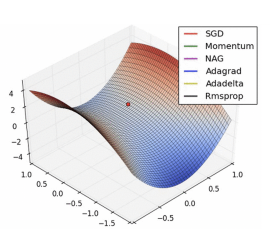

In [24]:
Image("21.png")

- optimizer는 loss 함수를 최소화하는 가중치를 찾아가는 과정에 대한 알고리즘이다.
- 여기서는 rmsprop를 사용

## 2.15 summary

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## 2.16 모델을 다 구성했다

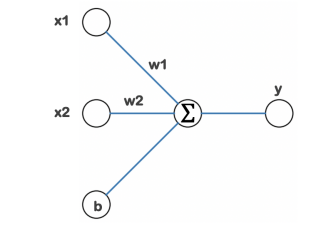

In [25]:
Image("22.png")

## 2.17 다음은?

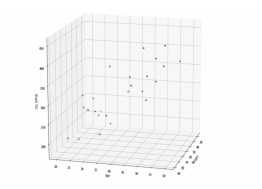

In [26]:
Image("23.png")

- 

## 2.18 fit~ 학습~

In [61]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 172ms/step - loss: 50388.4414
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 50236.3359
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 50126.2188
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 50034.1602
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 49952.5391
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 49877.8281
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 49808.0547
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 49741.9961
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 49678.8164
Epoch 10/5000
1/1 [==============================] - 0s 4ms/step - loss: 49617.9492
Epoch 11/5000
1/1 [==============================] - 0s 5ms/step - loss: 49558.9766
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 49501.5547

## 2.19 loss가 잘 떨어진다

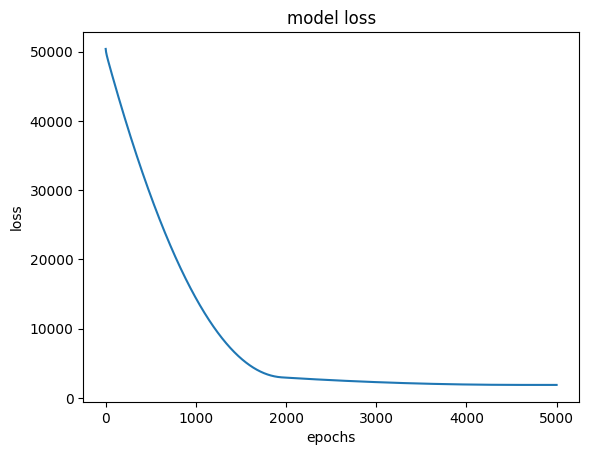

In [62]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## 2.20 predict 해볼까?

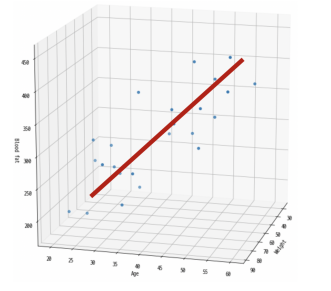

In [27]:
Image("24.png")

- 데이터를 이용해서
- 모델을 만들고
- 학습했으니
- 예측해보자
- 몸무게 100에 44살 된 사람의 이 데이터에서의 Blood Fat은?

## 2.21 사용법은 sklearn과 비슷하다

In [63]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 [==============================] - 0s 72ms/step


array([[375.01968]], dtype=float32)

In [64]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 17ms/step


array([[219.19853]], dtype=float32)

## 2.22 가중치와 bias를 알고 싶다면

In [65]:
W_, b_ = model.get_weights()
print('Weight : ', W_)
print('bias is : ', b_)

Weight :  [[1.2492034]
 [5.5712132]]
bias is :  [4.965986]


## 2.23 모델이 잘 만들어졌는지 확인하기 위해 데이터를 만들고

In [66]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

## 2.24 그리기를 시도하자

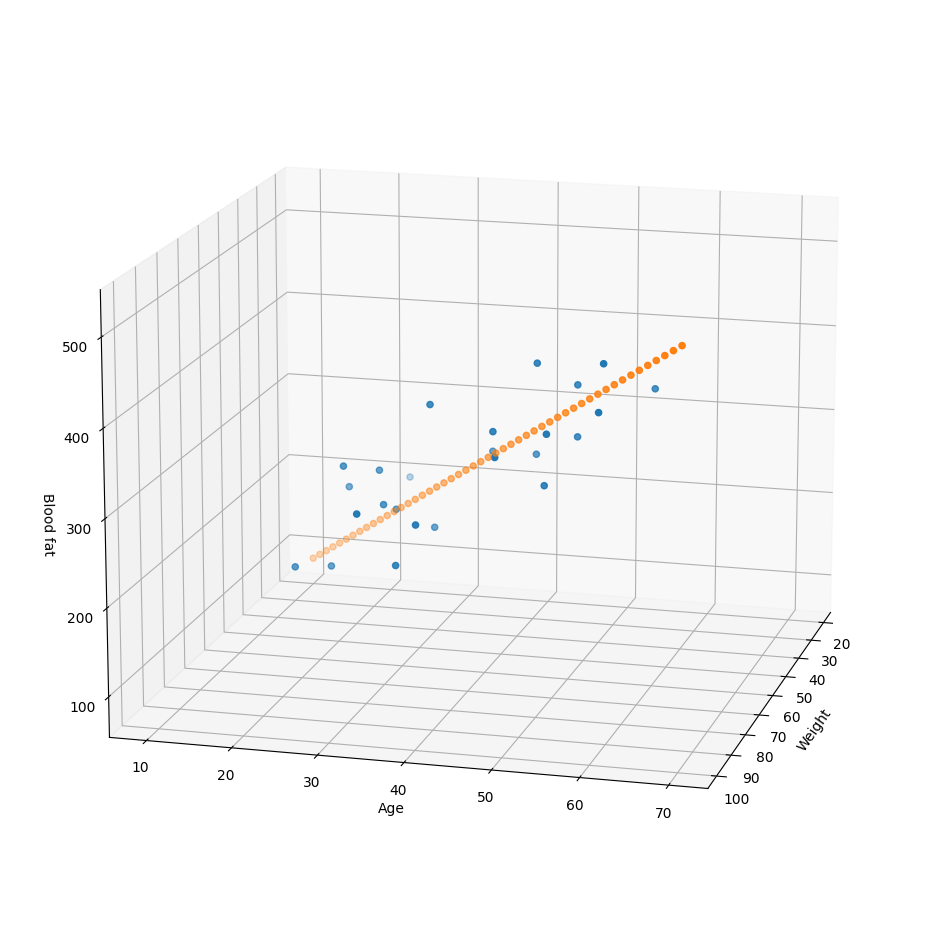

In [67]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

# 3 XOR 문제

## 3.1 XOR

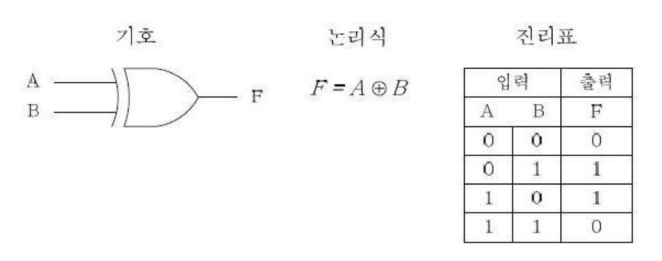

In [28]:
Image("25.png")

## 3.2 선형 모델로는 XOR를 풀 수가 없다

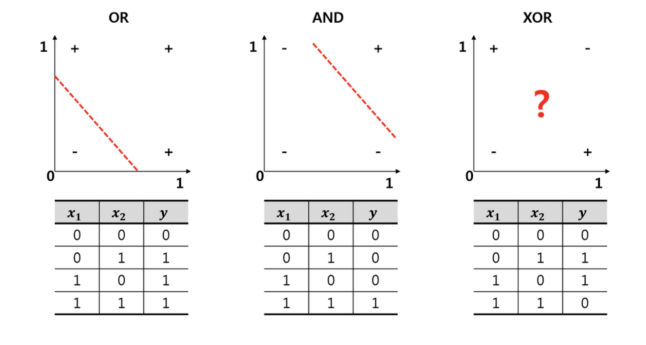

In [29]:
Image("26.png")

## 3.3 간단히 데이터를 준비하고

In [68]:
import numpy as np

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

## 3.4 모델은 간단히

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## 3.5 위 모델은 어떻게 생겼을까

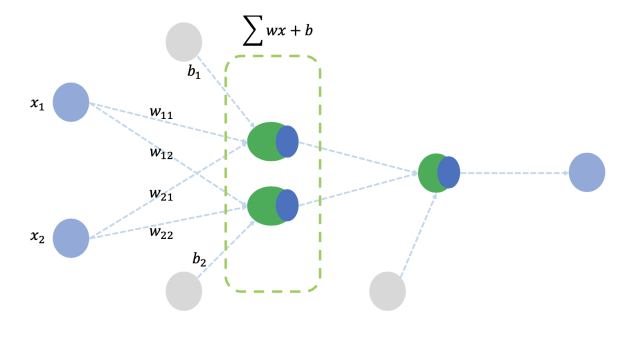

In [30]:
Image("27.png")

## 3.6 model.compile

In [70]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

- 옵티마이저를 선정하고, 학습률을 선정한다.
- loss 함수는 mse로 한다 mean squared error

## 3.7 model.summary

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## 3.8 학습

In [72]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2952
Epoch 2/5000
4/4 [==============================] - 0s 893us/step - loss: 0.2946
Epoch 3/5000
4/4 [==============================] - 0s 756us/step - loss: 0.2940
Epoch 4/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2934
Epoch 5/5000
4/4 [==============================] - 0s 829us/step - loss: 0.2928
Epoch 6/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2922
Epoch 7/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2916
Epoch 8/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2911
Epoch 9/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2905
Epoch 10/5000
4/4 [==============================] - 0s 1ms/step - loss: 0.2899
Epoch 11/5000
4/4 [==============================] - 0s 981us/step - loss: 0.2894
Epoch 12/5000
4/4 [==============================] - 0s 809us/step - loss: 0.2888
Epoch 13/5000
4/4 [====================

## 3.9 학습결과

In [73]:
model.predict(X)

1/1 [==============================] - 0s 102ms/step


array([[0.39414605],
       [0.54699165],
       [0.54104227],
       [0.57519287]], dtype=float32)

## 3.10 loss 상황

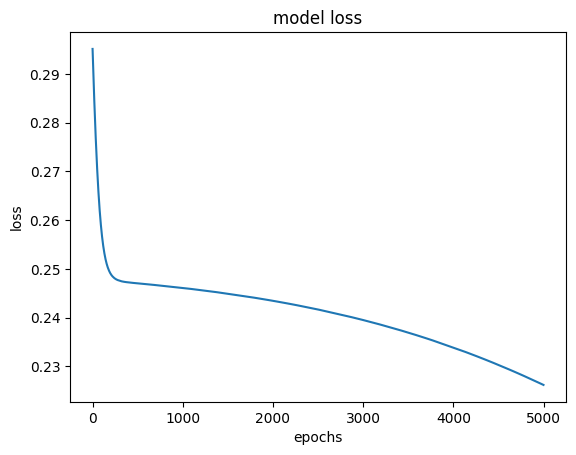

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## 3.11 학습에서 찾은 가중치

In [79]:
for w in model.weights:
    print('---')
    print(w)

---
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[0.63183033, 2.1156235 ],
       [1.1305896 , 2.0979264 ]], dtype=float32)>
---
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-0.02681941, -0.02407863], dtype=float32)>
---
<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.20280214],
       [ 1.6399271 ]], dtype=float32)>
---
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-1.1399683], dtype=float32)>


# 4 이번에는 분류로~

## 4.1 iris 데이터

In [80]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

## 4.2 그런데 y는 이렇게 생겼다

In [81]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 4.3 One hot encoding

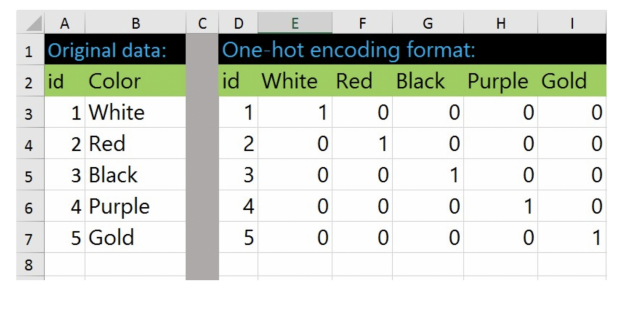

In [31]:
Image("28.png")

## 4.4 sklearn의 one hot encoding

In [82]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

## 4.5 이제 학습 준비가 되었다

In [83]:
enc.categories_

[array([0, 1, 2])]

In [84]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## 4.6 데이터 나누고

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot,
                                                    test_size=0.2,
                                                    random_state=13)

## 4.7 난 망(net)을 이렇게 구성하기로 했다

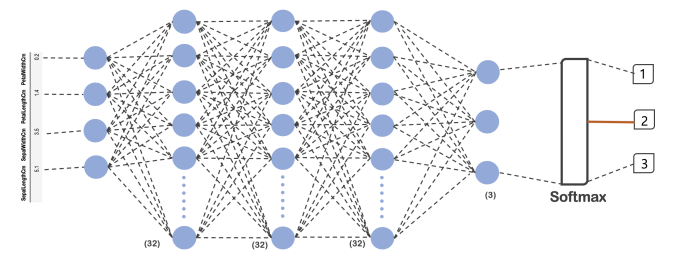

In [32]:
Image("29.png")

## 4.8 이렇게 하면 된다

In [97]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

## 4.9 activation

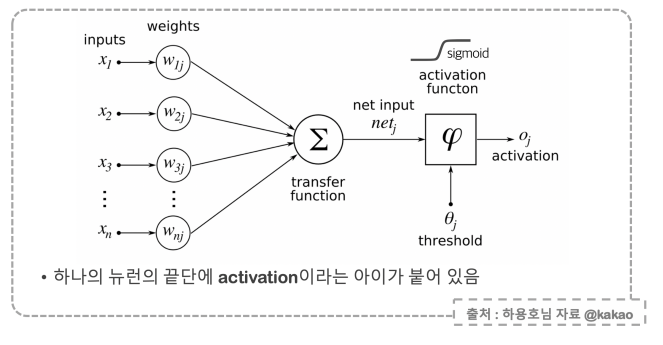

In [88]:
Image("30.png")

## 4.10 역전파 back-propagation

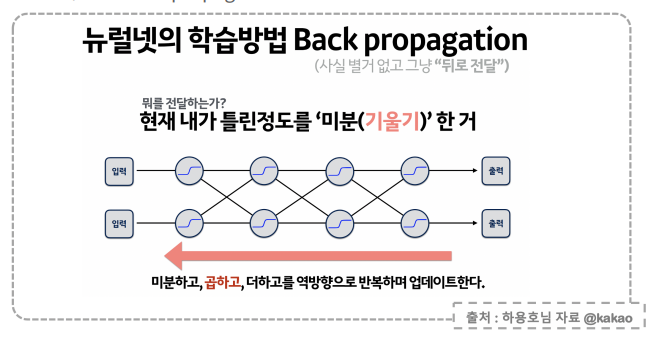

In [89]:
Image("31.png")

## 4.11 역전파에서는 sigmoid가 문제가 있다

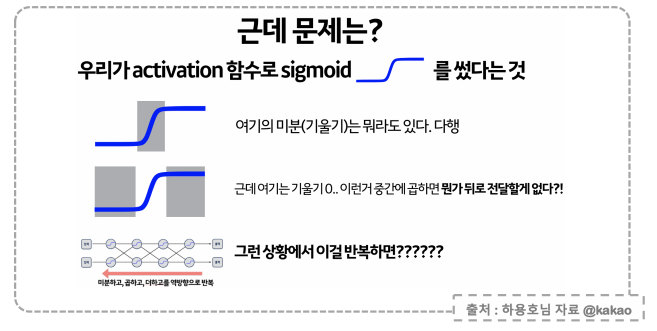

In [90]:
Image("32.png")

## 4.12 gradient vanishing

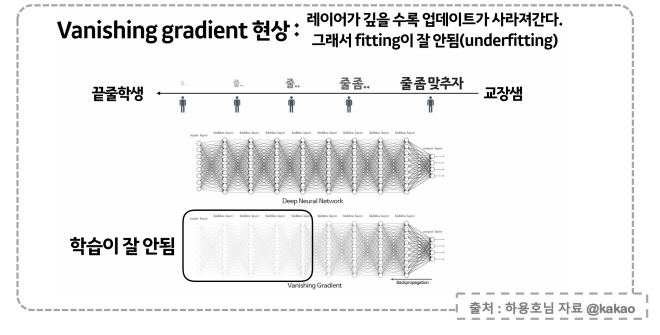

In [91]:
Image("33.png")

## 4.13 ReLU의 등장

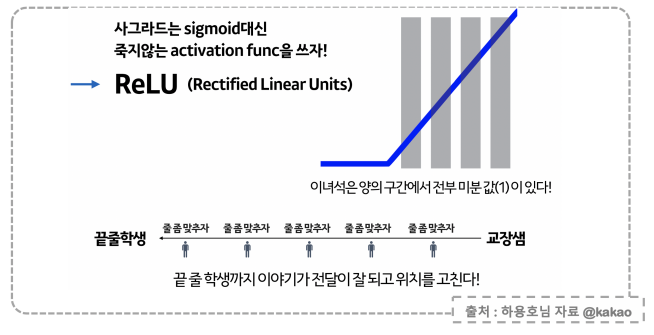

In [92]:
Image("34.png")

## 4.14 softmax?

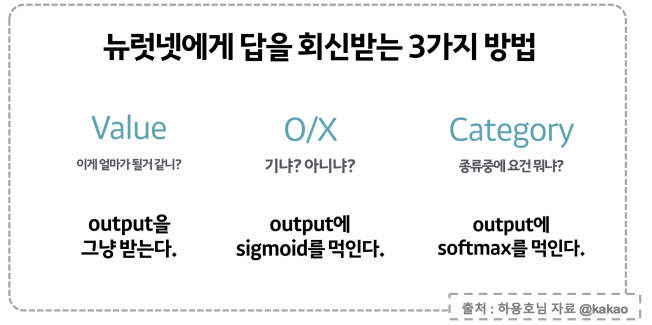

In [93]:
Image("35.png")

## 4.15 완성된 모델

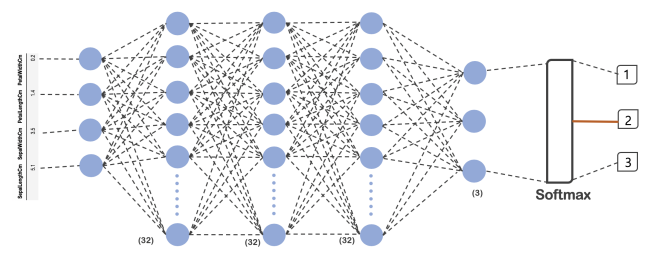

In [94]:
Image("36.png")

## 4.16 adam?

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                160       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


## 4.17 gradient decent는 배웠다

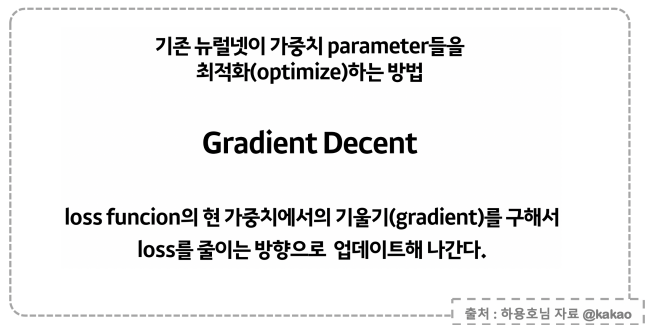

In [40]:
Image("37.png")

## 4.18 복습차원에서~

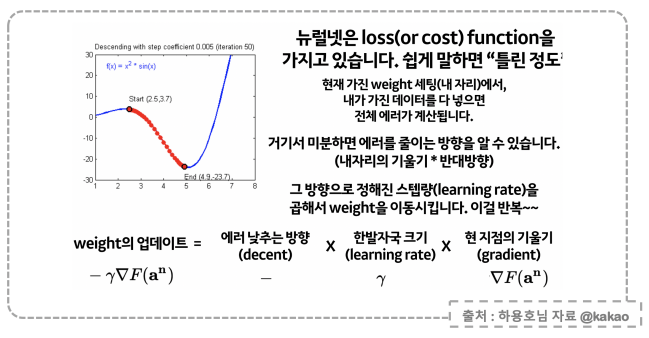

In [41]:
Image("38.png")

## 4.19 SGD

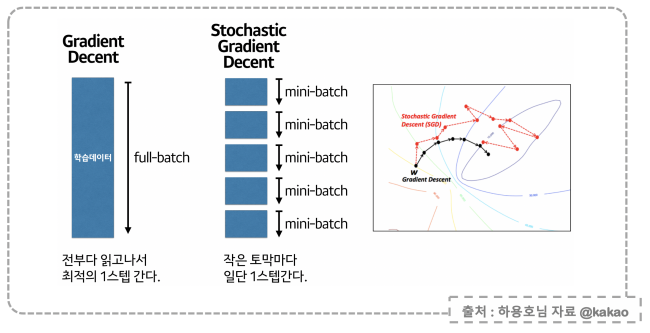

In [42]:
Image("39.png")

## 4.20 GD vs SGD

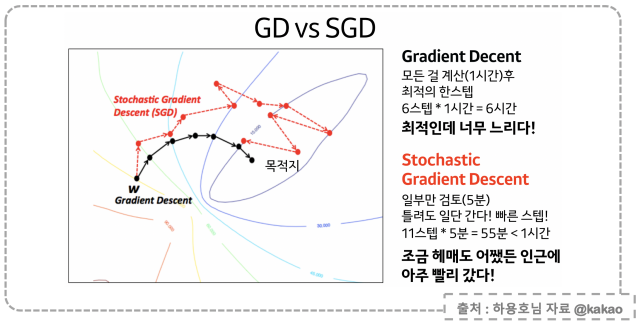

In [43]:
Image("40.png")

## 4.21 옵티마이저의 선택

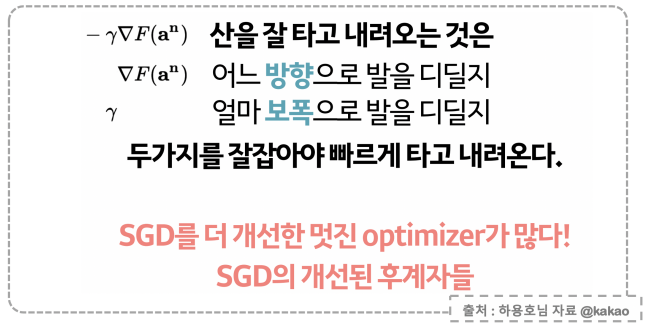

In [44]:
Image("41.png")

## 4.22 옵티마이저 계보

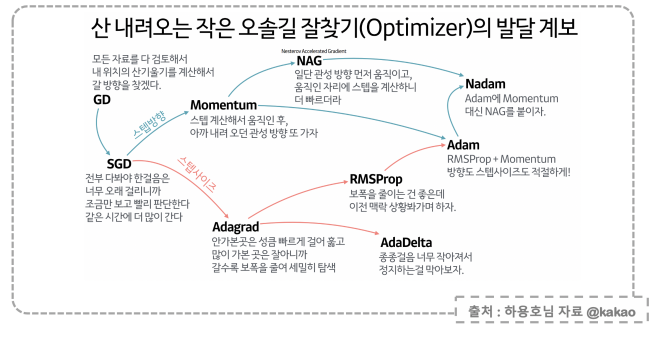

In [45]:
Image("42.png")

## 4.23 데이터가 복잡할 때는 일단 Adam을 써보자

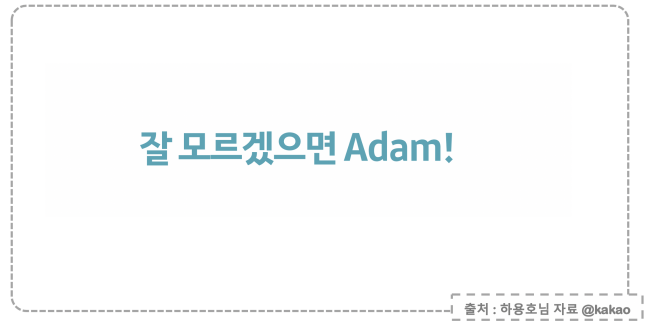

In [14]:
Image("43.png")

## 4.24 summary 결과

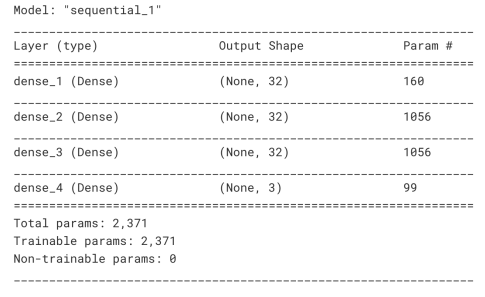

In [15]:
Image("44.png")

## 4.25 학습

In [102]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2801 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1405 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0488 - accuracy: 0.3583
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9853 - accuracy: 0.5333
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9322 - accuracy: 0.6500
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8799 - accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8310 - accuracy: 0.6583
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7817 - accuracy: 0.7500
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7355 - accuracy: 0.8417
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.8667
Epoch 11/100
4/4 [===========

## 4.26 test 데이터에 대한 accuracy

In [103]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.0833 - accuracy: 1.0000 - 101ms/epoch - 101ms/step


[0.08333849906921387, 1.0]